# Import libraries and data

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn libraries
from sklearn.model_selection import train_test_split ,KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Binarizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import lighbgbm
from lightgbm import LGBMClassifier, plot_importance

# Import graphviz
import graphviz

# Import warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Fetch data
!unzip -o archive.zip

Archive:  archive.zip
  inflating: Montreal Crime Data.csv  


In [3]:
# Create DataFrame based on data
crimes = pd.read_csv('Montreal Crime Data.csv')
crimes

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
...,...,...,...,...,...,...,...,...,...,...
136637,136637,Motor vehicle theft,2020-03-25,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452
136638,136638,Motor vehicle theft,2020-03-27,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452
136639,136639,Mischief,2021-04-01,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452
136640,136640,Home Invasion,2021-06-06,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452


# Data Preprocessing

In [4]:
# Check whether rows contain Null
crimes.isnull().sum()

Unnamed: 0       0
category         0
date             0
postal_code      0
city             0
neighbourhood    0
year             0
count            0
longitude        0
latitude         0
dtype: int64

In [5]:
# Check whether rows contain NaN
crimes.isna().sum()

Unnamed: 0       0
category         0
date             0
postal_code      0
city             0
neighbourhood    0
year             0
count            0
longitude        0
latitude         0
dtype: int64

## Check distribution of each features

### Category

0  :  ['Confirmed Theft']
1  :  ['Home Invasion']
2  :  ['Mischief']
3  :  ['Motor vehicle theft']
4  :  ['Offenses resulting in death']
5  :  ['Theft in / from a motor vehicle']


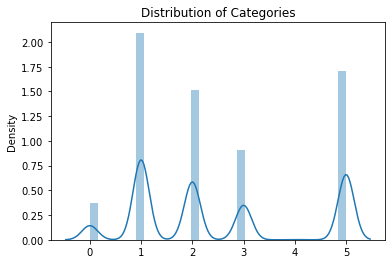

In [6]:
# Check the distribution of 'category'
categories = crimes['category']
le = LabelEncoder()
categories_le = le.fit_transform(categories)
plt.title('Distribution of Categories')
sns.distplot(categories_le)
labels = enumerate(range(0, 6, 1))
for i, label in labels:
    print(i, " : ", le.inverse_transform([label]))

In [7]:
# As you can see that plot, density of 'Offenses resulting in death' is much lower than any other categories
# So, I think dropping that category can be a good idea.
drop_category_rows = crimes[crimes['category'] == 'Offenses resulting in death'].index
crimes.drop(drop_category_rows, inplace=True)
crimes

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
...,...,...,...,...,...,...,...,...,...,...
136637,136637,Motor vehicle theft,2020-03-25,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452
136638,136638,Motor vehicle theft,2020-03-27,H4Y 1G6,DORVAL,Dorval,2020,1,-73.752,45.452
136639,136639,Mischief,2021-04-01,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452
136640,136640,Home Invasion,2021-06-06,H4Y 1G6,DORVAL,Dorval,2021,1,-73.752,45.452


0  :  ['Confirmed Theft']
1  :  ['Home Invasion']
2  :  ['Mischief']
3  :  ['Motor vehicle theft']
4  :  ['Theft in / from a motor vehicle']


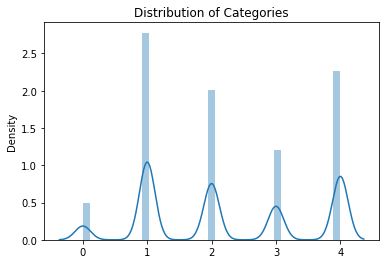

In [8]:
# RE-Check the distribution of 'category'
categories = crimes['category']
le = LabelEncoder()
categories_le = le.fit_transform(categories)
plt.title('Distribution of Categories')
sns.distplot(categories_le)
labels = enumerate(range(0, 5, 1))
for i, label in labels:
    print(i, " : ", le.inverse_transform([label]))

### City

0  :  ['ANJOU']
1  :  ["BAIE-D'URFE"]
2  :  ['BEACONSFIELD']
3  :  ['COTE SAINT-LUC']
4  :  ['DOLLARD-DES-ORMEAUX']
5  :  ['DORVAL']
6  :  ['HAMPSTEAD']
7  :  ['KIRKLAND']
8  :  ["L'ILE-BIZARD"]
9  :  ['LACHINE']
10  :  ['LASALLE']
11  :  ['MONT-ROYAL']
12  :  ['MONTREAL']
13  :  ['MONTREAL-EST']
14  :  ['MONTREAL-NORD']
15  :  ['MONTREAL-OUEST']
16  :  ['OUTREMONT']
17  :  ['PIERREFONDS']
18  :  ['POINTE-AUX-TREMBLES']
19  :  ['POINTE-CLAIRE']
20  :  ['ROXBORO']
21  :  ['SAINT-LAURENT']
22  :  ['SAINT-LEONARD']
23  :  ['SAINTE-ANNE-DE-BELLEVUE']
24  :  ['SAINTE-GENEVIEVE']
25  :  ['SENNEVILLE']
26  :  ['VERDUN']
27  :  ['WESTMOUNT']


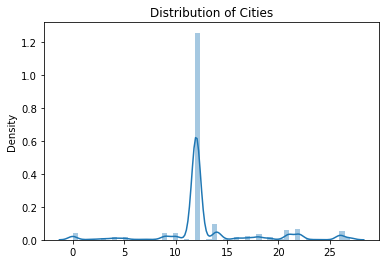

In [9]:
# Check the distribution of 'city'
cities = crimes['city']
le = LabelEncoder()
cities_le = le.fit_transform(cities)
plt.title('Distribution of Cities')
sns.distplot(cities_le)
labels = enumerate(range(0, 28, 1))
for i, label in labels:
    print(i, " : ", le.inverse_transform([label]))

In [10]:
# Check how many 'postal code' has unique values
len_city_unique = len(crimes.city.unique())
print('The number of unique values: ', len_city_unique)
print('The proportion of unique values: ', round(len_city_unique / len(crimes['city']) * 100, 3),'%')

The number of unique values:  28
The proportion of unique values:  0.021 %


In [11]:
# As you can see that plot, density of 'Offenses resulting in death' is much lower than any other categories
# So, I think dropping that category can be a good idea.
drop_city_rows = crimes[crimes['city'] != 'MONTREAL'].index
crimes.drop(drop_city_rows, inplace=True)
crimes

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
...,...,...,...,...,...,...,...,...,...,...
136515,136515,Theft in / from a motor vehicle,2021-06-06,H4Z 0A5,MONTREAL,Downtown Montreal,2021,1,-73.562,45.501
136516,136516,Theft in / from a motor vehicle,2021-06-20,H4Z 0A5,MONTREAL,Downtown Montreal,2021,1,-73.562,45.501
136517,136517,Theft in / from a motor vehicle,2021-05-12,H4Z 0A5,MONTREAL,Downtown Montreal,2021,1,-73.562,45.501
136518,136518,Theft in / from a motor vehicle,2021-05-03,H4Z 0A5,MONTREAL,Downtown Montreal,2021,1,-73.562,45.501


### Neighbourhood

0  :  ['Ahuntsic']
1  :  ['Anjou']
2  :  ['Cartierville']
3  :  ['Centre-Sud']
4  :  ['Côte Saint-Luc']
5  :  ['Côte-des-Neiges']
6  :  ['Downtown Montreal']
7  :  ['Griffintown(Includes Île Notre-Dame & Île Sainte-Hélène)(Université de Montréal)']
8  :  ['Hampstead / Côte Saint-Luc']
9  :  ['Hochelaga']
10  :  ['Maisonneuve']
11  :  ['Mercier']
12  :  ['Montreal East']
13  :  ['Montréal-Nord']
14  :  ['Mount Royal']
15  :  ['Notre-Dame-de-Grâce']
16  :  ['Old Montreal']
17  :  ['Outremont']
18  :  ['Parc-Extension']
19  :  ['Petite-Bourgogne']
20  :  ['Petite-Patrie']
21  :  ['Plateau Mont-Royal']
22  :  ['Pointe-Saint-Charles']
23  :  ['Pointe-aux-Trembles']
24  :  ['Rivière-des-Prairies']
25  :  ['Rosemont']
26  :  ['Saint-Henri']
27  :  ['Saint-Laurent']
28  :  ['Saint-Léonard']
29  :  ['Saint-Michel']
30  :  ['Saint-Michel,East']
31  :  ['Ville Émard']
32  :  ['Villeray']
33  :  ['Westmount']


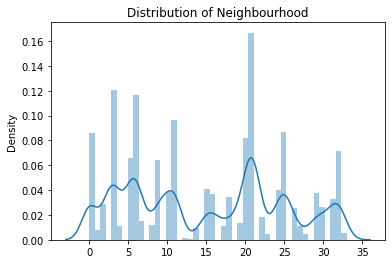

In [12]:
# Check the distribution of 'neighbourhood'
neighbour = crimes['neighbourhood']
le = LabelEncoder()
neighbourhood_le = le.fit_transform(neighbour)
plt.title('Distribution of Neighbourhood')
sns.distplot(neighbourhood_le)
labels = enumerate(range(0, 34, 1))
for i, label in labels:
    print(i, " : ", le.inverse_transform([label]))

## Data Cleansing

In [13]:
# The proportion of unique values of city is too low as about 0%
# Therefore, we can drop that feature.
# Drop unnecessary features
crimes.drop(['Unnamed: 0', 'postal_code', 'count'], axis=1, inplace=True)
crimes

,category,date,city,neighbourhood,year,longitude,latitude
0,Motor vehicle theft,2018-09-13,MONTREAL,Saint-Michel,2018,-73.626,45.567
1,Motor vehicle theft,2018-04-30,MONTREAL,Saint-Michel,2018,-73.626,45.567
2,Home Invasion,2018-01-10,MONTREAL,Saint-Michel,2018,-73.629,45.569
3,Mischief,2018-11-12,MONTREAL,Saint-Michel,2018,-73.629,45.569
4,Mischief,2018-08-15,MONTREAL,Saint-Michel,2018,-73.629,45.569
...,...,...,...,...,...,...,...
136515,Theft in / from a motor vehicle,2021-06-06,MONTREAL,Downtown Montreal,2021,-73.562,45.501
136516,Theft in / from a motor vehicle,2021-06-20,MONTREAL,Downtown Montreal,2021,-73.562,45.501
136517,Theft in / from a motor vehicle,2021-05-12,MONTREAL,Downtown Montreal,2021,-73.562,45.501
136518,Theft in / from a motor vehicle,2021-05-03,MONTREAL,Downtown Montreal,2021,-73.562,45.501
